In [2]:
# Test
print("hello")

hello


In [3]:
#pip install pandas

In [4]:
# Dict and List
import pandas as pd
import numpy as np

s = {
    'a': {
        'd': [
            {
                'e': 'a',
                'f': '1'
            },
            {
                'e': 'b',
                'f': '2'
            }
        ],
    },
    'b': {
        'd': [
            {
                'e': 'c',
                'f': '3'
            },
            {
                'e': 'd',
                'f': '4'
            }
        ],
    },
    'c': {
        'd': [
            {
                'e': 'e',
                'f': '5'
            },
            {
                'e': 'f',
                'f': '6'
            }
        ],
    }
}

k  = 'a'

In [5]:
df_date = pd.DataFrame(
    [[x['e'], x['f']] for x in s[k]['d']],
    columns=['alphabet', 'number']
)
df_date

,alphabet,number
0,a,1
1,b,2


# 10 minutes to pandas
https://pandas.pydata.org/docs/user_guide/10min.html

- Basic data structures in pandas
- Object creation
- Viewing data
- Selection
- Missing data
- Operations
- Merge
- Grouping
- Reshaping
- Time series
- Categoricals
- Plotting
- Importing and exporting data


# Object creation

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.339145,0.791044,-1.737247,1.814173
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727
2013-01-04,-0.573514,0.836535,-0.422753,0.565589
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250


In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


# Viewing data

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.339145,0.791044,-1.737247,1.814173
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727
2013-01-04,-0.573514,0.836535,-0.422753,0.565589
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.573514,0.836535,-0.422753,0.565589
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.to_numpy()

array([[-0.33914483,  0.79104403, -1.73724673,  1.81417332],
       [-0.24153544, -0.68910394, -0.405931  , -0.00636592],
       [ 0.27272221,  1.14617578,  0.23564333, -0.07272749],
       [-0.57351411,  0.83653515, -0.42275267,  0.56558938],
       [-1.32543521, -0.76133933,  0.3744432 , -0.75301102],
       [-0.36662791,  1.31883324, -0.47479834, -0.07524954]])

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.428923,0.440357,-0.405107,0.245401
std,0.522303,0.924077,0.748067,0.874963
min,-1.325435,-0.761339,-1.737247,-0.753011
25%,-0.521793,-0.319067,-0.461787,-0.074619
50%,-0.352886,0.813790,-0.414342,-0.039547
75%,-0.265938,1.068766,0.075250,0.422601
max,0.272722,1.318833,0.374443,1.814173


In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.339145,-0.241535,0.272722,-0.573514,-1.325435,-0.366628
B,0.791044,-0.689104,1.146176,0.836535,-0.761339,1.318833
C,-1.737247,-0.405931,0.235643,-0.422753,0.374443,-0.474798
D,1.814173,-0.006366,-0.072727,0.565589,-0.753011,-0.075250


In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.814173,-1.737247,0.791044,-0.339145
2013-01-02,-0.006366,-0.405931,-0.689104,-0.241535
2013-01-03,-0.072727,0.235643,1.146176,0.272722
2013-01-04,0.565589,-0.422753,0.836535,-0.573514
2013-01-05,-0.753011,0.374443,-0.761339,-1.325435
2013-01-06,-0.075250,-0.474798,1.318833,-0.366628


In [19]:
df.sort_values(by="B")

,A,B,C,D
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-01,-0.339145,0.791044,-1.737247,1.814173
2013-01-04,-0.573514,0.836535,-0.422753,0.565589
2013-01-03,0.272722,1.146176,0.235643,-0.072727
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250



# Selection

## GetItem

In [20]:
df["A"]

2013-01-01   -0.339145
2013-01-02   -0.241535
2013-01-03    0.272722
2013-01-04   -0.573514
2013-01-05   -1.325435
2013-01-06   -0.366628
Freq: D, Name: A, dtype: float64

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,-0.339145,0.791044,-1.737247,1.814173
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727


In [22]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727
2013-01-04,-0.573514,0.836535,-0.422753,0.565589


## Selection by label

In [23]:
df.loc[dates[0]]

A   -0.339145
B    0.791044
C   -1.737247
D    1.814173
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.339145,0.791044
2013-01-02,-0.241535,-0.689104
2013-01-03,0.272722,1.146176
2013-01-04,-0.573514,0.836535
2013-01-05,-1.325435,-0.761339
2013-01-06,-0.366628,1.318833


In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.241535,-0.689104
2013-01-03,0.272722,1.146176
2013-01-04,-0.573514,0.836535


In [26]:
df.loc[dates[0], "A"]

np.float64(-0.33914482967919607)

In [27]:
df.at[dates[0], "A"]

np.float64(-0.33914482967919607)

## Selection by position

In [28]:
df.iloc[3]

A   -0.573514
B    0.836535
C   -0.422753
D    0.565589
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.573514,0.836535
2013-01-05,-1.325435,-0.761339


In [30]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.241535,-0.405931
2013-01-03,0.272722,0.235643
2013-01-05,-1.325435,0.374443


In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727


In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.791044,-1.737247
2013-01-02,-0.689104,-0.405931
2013-01-03,1.146176,0.235643
2013-01-04,0.836535,-0.422753
2013-01-05,-0.761339,0.374443
2013-01-06,1.318833,-0.474798


In [33]:
df.iloc[1, 1]

np.float64(-0.6891039380763867)

In [34]:
df.iat[1, 1]

np.float64(-0.6891039380763867)

## Boolean indexing

In [35]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.272722,1.146176,0.235643,-0.072727


In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.791044,NaN,1.814173
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.272722,1.146176,0.235643,NaN
2013-01-04,NaN,0.836535,NaN,0.565589
2013-01-05,NaN,NaN,0.374443,NaN
2013-01-06,NaN,1.318833,NaN,NaN


In [37]:
df

,A,B,C,D
2013-01-01,-0.339145,0.791044,-1.737247,1.814173
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366
2013-01-03,0.272722,1.146176,0.235643,-0.072727
2013-01-04,-0.573514,0.836535,-0.422753,0.565589
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250


In [38]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.339145,0.791044,-1.737247,1.814173,one
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366,one
2013-01-03,0.272722,1.146176,0.235643,-0.072727,two
2013-01-04,-0.573514,0.836535,-0.422753,0.565589,three
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011,four
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250,three


In [39]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.272722,1.146176,0.235643,-0.072727,two
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011,four


## Setting

In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

In [41]:
df

,A,B,C,D,F
2013-01-01,-0.339145,0.791044,-1.737247,1.814173,NaN
2013-01-02,-0.241535,-0.689104,-0.405931,-0.006366,1.0
2013-01-03,0.272722,1.146176,0.235643,-0.072727,2.0
2013-01-04,-0.573514,0.836535,-0.422753,0.565589,3.0
2013-01-05,-1.325435,-0.761339,0.374443,-0.753011,4.0
2013-01-06,-0.366628,1.318833,-0.474798,-0.075250,5.0


In [42]:
df.at[dates[0], "A"] = 0
df.iat[0, 1] = 0
df.loc[:, "D"] = np.array([5] * len(df))

In [43]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.737247,5.0,NaN
2013-01-02,-0.241535,-0.689104,-0.405931,5.0,1.0
2013-01-03,0.272722,1.146176,0.235643,5.0,2.0
2013-01-04,-0.573514,0.836535,-0.422753,5.0,3.0
2013-01-05,-1.325435,-0.761339,0.374443,5.0,4.0
2013-01-06,-0.366628,1.318833,-0.474798,5.0,5.0


In [44]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.737247,-5.0,NaN
2013-01-02,-0.241535,-0.689104,-0.405931,-5.0,-1.0
2013-01-03,-0.272722,-1.146176,-0.235643,-5.0,-2.0
2013-01-04,-0.573514,-0.836535,-0.422753,-5.0,-3.0
2013-01-05,-1.325435,-0.761339,-0.374443,-5.0,-4.0
2013-01-06,-0.366628,-1.318833,-0.474798,-5.0,-5.0


# Missing data

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.737247,5.0,NaN,1.0
2013-01-02,-0.241535,-0.689104,-0.405931,5.0,1.0,1.0
2013-01-03,0.272722,1.146176,0.235643,5.0,2.0,NaN
2013-01-04,-0.573514,0.836535,-0.422753,5.0,3.0,NaN


In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.241535,-0.689104,-0.405931,5.0,1.0,1.0


In [47]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.737247,5.0,5.0,1.0
2013-01-02,-0.241535,-0.689104,-0.405931,5.0,1.0,1.0
2013-01-03,0.272722,1.146176,0.235643,5.0,2.0,5.0
2013-01-04,-0.573514,0.836535,-0.422753,5.0,3.0,5.0


In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

In [49]:
## Stats
df.mean()

A   -0.372398
B    0.308517
C   -0.405107
D    5.000000
F    3.000000
dtype: float64

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.737247,5.0,NaN
2013-01-02,-0.241535,-0.689104,-0.405931,5.0,1.0
2013-01-03,0.272722,1.146176,0.235643,5.0,2.0
2013-01-04,-0.573514,0.836535,-0.422753,5.0,3.0
2013-01-05,-1.325435,-0.761339,0.374443,5.0,4.0
2013-01-06,-0.366628,1.318833,-0.474798,5.0,5.0


In [51]:
df.mean(axis=1)

2013-01-01    0.815688
2013-01-02    0.932686
2013-01-03    1.730908
2013-01-04    1.568054
2013-01-05    1.457534
2013-01-06    2.095481
Freq: D, dtype: float64

In [52]:
pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [53]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [54]:
## User defined functions
df.agg(lambda x: np.mean(x) * 5.6)

A    -2.085431
B     1.727694
C    -2.268599
D    28.000000
F    16.800000
dtype: float64

In [55]:
## Value Counts
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    2
3    1
4    5
5    2
6    5
7    1
8    2
9    0
dtype: int32

In [56]:
s.value_counts()

2    4
1    2
5    2
3    1
0    1
Name: count, dtype: int64

In [57]:
## String Methods
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.046944,1.994774,1.699924,-1.224138
1,0.884574,-1.257287,-1.718597,-0.696003
2,0.097685,-1.089442,0.062759,0.577471
3,-1.268820,2.520130,-0.390949,-0.351600
4,2.039781,-2.162265,-0.198719,0.359379
5,1.975297,0.514485,0.666046,0.925220
6,0.521344,1.574053,0.658842,1.175291
7,0.964506,-0.712943,-2.112920,-1.302357
8,0.224590,0.004143,-0.037871,0.430296
9,-0.558745,0.702235,1.100692,-0.553472


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.046944,1.994774,1.699924,-1.224138
1,0.884574,-1.257287,-1.718597,-0.696003
2,0.097685,-1.089442,0.062759,0.577471
3,-1.268820,2.520130,-0.390949,-0.351600
4,2.039781,-2.162265,-0.198719,0.359379
5,1.975297,0.514485,0.666046,0.925220
6,0.521344,1.574053,0.658842,1.175291
7,0.964506,-0.712943,-2.112920,-1.302357
8,0.224590,0.004143,-0.037871,0.430296
9,-0.558745,0.702235,1.100692,-0.553472


## Join

In [60]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right

,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [63]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [64]:
right

,key,rval
0,foo,4
1,bar,5


In [65]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5



# Grouping

In [66]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,1.203835,-0.421794
1,bar,one,-1.182592,-0.623848
2,foo,two,1.307655,-0.509408
3,bar,three,-0.942702,1.668014
4,foo,two,1.201656,-0.247914
5,bar,two,1.575478,1.657487
6,foo,one,1.429962,0.156920
7,foo,three,-0.260298,0.598430


In [67]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-0.549816,2.701653
foo,4.882811,-0.423765


In [68]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.182592 -0.623848
    three -0.942702  1.668014
    two    1.575478  1.657487
foo one    2.633797 -0.264873
    three -0.260298  0.598430
    two    2.509311 -0.757322

# Reshaping

## Stack

In [69]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [70]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.446839  0.941360
      two    -0.427886  1.363379
baz   one     0.064046  0.272102
      two    -0.281825  0.650457
foo   one    -1.242825 -0.786204
      two    -0.043903  0.844587
qux   one    -0.139284  0.761659
      two    -0.403044  0.099146

In [71]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.446839  0.941360
      two    -0.427886  1.363379
baz   one     0.064046  0.272102
      two    -0.281825  0.650457

In [72]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A    0.446839
               B    0.941360
       two     A   -0.427886
               B    1.363379
baz    one     A    0.064046
               B    0.272102
       two     A   -0.281825
               B    0.650457
dtype: float64

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     0.446839  0.941360
      two    -0.427886  1.363379
baz   one     0.064046  0.272102
      two    -0.281825  0.650457

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.446839 -0.427886
      B  0.941360  1.363379
baz   A  0.064046 -0.281825
      B  0.272102  0.650457

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.446839  0.064046
       B  0.941360  0.272102
two    A -0.427886 -0.281825
       B  1.363379  0.650457

## Pivot tables

In [76]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.024194,0.053007
1,one,B,foo,0.358808,0.447768
2,two,C,foo,0.131032,0.519353
3,three,A,bar,-0.293166,0.939311
4,one,B,bar,0.770546,-0.707594
5,one,C,bar,-2.247858,0.182024
6,two,A,foo,0.058153,0.116066
7,three,B,foo,0.616699,0.246127
8,one,C,foo,-0.809361,-0.196086
9,one,A,bar,-0.802638,-0.332690


In [77]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.802638 -0.024194
      B  0.770546  0.358808
      C -2.247858 -0.809361
three A -0.293166       NaN
      B       NaN  0.616699
      C  0.236807       NaN
two   A       NaN  0.058153
      B  1.706534       NaN
      C       NaN  0.131032


# Time series

In [78]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [79]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    260
2012-01-01 00:00:01    290
2012-01-01 00:00:02    377
2012-01-01 00:00:03    271
2012-01-01 00:00:04    135
                      ... 
2012-01-01 00:01:35    493
2012-01-01 00:01:36    463
2012-01-01 00:01:37    431
2012-01-01 00:01:38    162
2012-01-01 00:01:39    387
Freq: s, Length: 100, dtype: int32

In [80]:
ts.resample("5Min").sum()

2012-01-01    26925
Freq: 5min, dtype: int32

In [81]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.136404
2012-03-07    0.775637
2012-03-08   -0.573446
2012-03-09   -2.401417
2012-03-10    0.420161
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    1.136404
2012-03-07 00:00:00+00:00    0.775637
2012-03-08 00:00:00+00:00   -0.573446
2012-03-09 00:00:00+00:00   -2.401417
2012-03-10 00:00:00+00:00    0.420161
Freq: D, dtype: float64

In [83]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.136404
2012-03-06 19:00:00-05:00    0.775637
2012-03-07 19:00:00-05:00   -0.573446
2012-03-08 19:00:00-05:00   -2.401417
2012-03-09 19:00:00-05:00    0.420161
Freq: D, dtype: float64

In [84]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [85]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)


# Categoricals

In [86]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [87]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [88]:
new_categories = ["very good", "good", "very bad"]
new_categories

['very good', 'good', 'very bad']

In [89]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [90]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [91]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [92]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


# Plotting

In [93]:
#pip install matplotlib

In [94]:
import matplotlib.pyplot as plt

In [95]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01    0.036225
2000-01-02    0.734578
2000-01-03    0.194117
2000-01-04    1.667708
2000-01-05   -0.871639
                ...   
2002-09-22    0.001933
2002-09-23   -0.459193
2002-09-24   -0.657637
2002-09-25    0.763696
2002-09-26   -1.641470
Freq: D, Length: 1000, dtype: float64

In [96]:
ts = ts.cumsum()
ts

2000-01-01     0.036225
2000-01-02     0.770803
2000-01-03     0.964920
2000-01-04     2.632628
2000-01-05     1.760989
                ...    
2002-09-22    16.501218
2002-09-23    16.042024
2002-09-24    15.384387
2002-09-25    16.148083
2002-09-26    14.506613
Freq: D, Length: 1000, dtype: float64

<Axes: >

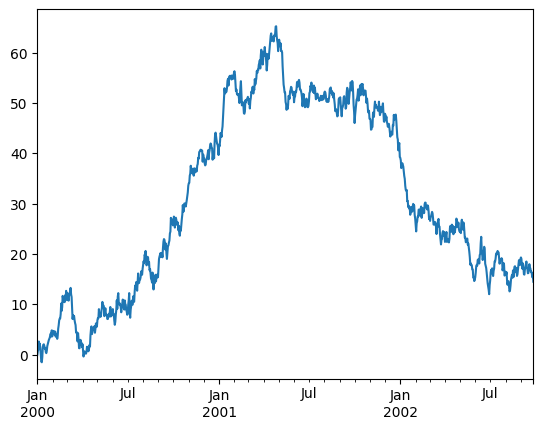

In [97]:
ts.plot()

In [98]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df

,A,B,C,D
2000-01-01,-0.531092,-0.131223,1.745597,-0.610057
2000-01-02,-0.267888,-0.304147,0.577936,-0.421933
2000-01-03,-0.161881,-0.087469,-1.020362,0.552106
2000-01-04,0.708737,0.597981,1.842972,0.142756
2000-01-05,-0.175552,0.897482,-0.151081,-0.287024
...,...,...,...,...
2002-09-22,-1.292237,-1.285234,0.644958,0.198907
2002-09-23,0.456742,2.437975,1.699225,-1.622670
2002-09-24,0.000313,1.832623,0.355178,0.421402
2002-09-25,0.994227,-0.898429,-0.189159,0.405440


<Figure size 640x480 with 0 Axes>

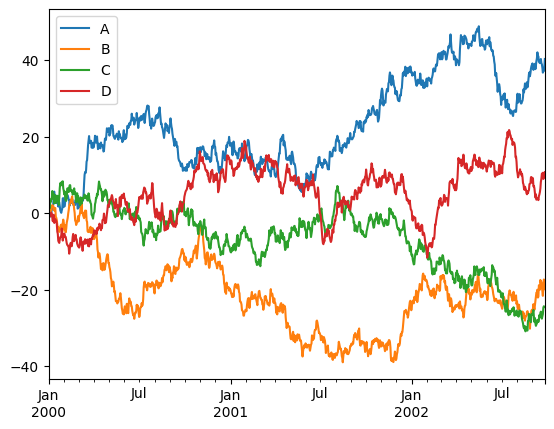

In [99]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")


# Importing and exporting data

## CSV

In [100]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

df.to_csv("foo.csv")

In [101]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,3,3,1,2,0
1,1,2,4,0,1,1
2,2,0,4,4,1,2
3,3,0,3,4,4,0
4,4,3,0,2,2,0
5,5,4,4,0,3,1
6,6,2,0,0,4,4
7,7,1,3,2,4,1
8,8,4,2,2,0,0
9,9,2,1,2,4,4


## Excel

In [102]:
#pip install openpyxl
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [103]:
pd.read_excel("foo.xlsx", "Sheet1")

,Unnamed: 0,0,1,2,3,4
0,0,3,3,1,2,0
1,1,2,4,0,1,1
2,2,0,4,4,1,2
3,3,0,3,4,4,0
4,4,3,0,2,2,0
5,5,4,4,0,3,1
6,6,2,0,0,4,4
7,7,1,3,2,4,1
8,8,4,2,2,0,0
9,9,2,1,2,4,4
